## 1. Google Play Store apps and reviews
<p>Mobile apps are everywhere. They are easy to create and can be lucrative. Because of these two factors, more and more apps are being developed. In this notebook, we will do a comprehensive analysis of the Android app market by comparing over ten thousand apps in Google Play across different categories. We'll look for insights in the data to devise strategies to drive growth and retention.</p>
<p><img src="https://assets.datacamp.com/production/project_619/img/google_play_store.png" alt="Google Play logo"></p>
<p>Let's take a look at the data, which consists of two files:</p>
<ul>
<li><code>apps.csv</code>: contains all the details of the applications on Google Play. There are 13 features that describe a given app.</li>
<li><code>user_reviews.csv</code>: contains 100 reviews for each app, <a href="https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/">most helpful first</a>. The text in each review has been pre-processed and attributed with three new features: Sentiment (Positive, Negative or Neutral), Sentiment Polarity and Sentiment Subjectivity.</li>
</ul>

In [70]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve,ShuffleSplit
from sklearn.model_selection import LearningCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
apps_with_duplicates = pd.read_csv(r"C:\The Android App Market on Google Play\datasets\apps.csv")

apps = apps_with_duplicates.drop_duplicates()

print('Total number of apps in the dataset = ', len(apps))

n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7304,8389,DG Hair,LIFESTYLE,NaN,0,3.00,10+,Free,0,Everyone,Lifestyle,"August 30, 2017",1.0.0,4.0 and up
9328,10503,Offroad 4x4 Car Driving,FAMILY,4.30,26224,43.00,"1,000,000+",Free,0,Everyone,Simulation,"April 29, 2017",1.0.4,2.3 and up
4242,5195,AI Benchmark,TOOLS,4.00,97,99.00,"5,000+",Free,0,Everyone,Tools,"June 29, 2018",2.0.0,4.1 and up
8011,9130,3G to 4G Converter - Simulator,TOOLS,4.20,268,2.40,"10,000+",Free,0,Everyone,Tools,"February 21, 2018",3.0.0,4.1 and up
6095,7139,CB Register,FAMILY,5.00,1,5.60,10+,Free,0,Everyone,Entertainment,"June 27, 2018",1,4.1 and up


In [2]:
apps.shape

(9659, 14)

## 2. Data cleaning
<p>Data cleaning is one of the most essential subtask any data science project. Although it can be a very tedious process, it's worth should never be undermined.</p>
<p>By looking at a random sample of the dataset rows (from the above task), we observe that some entries in the columns like <code>Installs</code> and <code>Price</code> have a few special characters (<code>+</code> <code>,</code> <code>$</code>) due to the way the numbers have been represented. This prevents the columns from being purely numeric, making it difficult to use them in subsequent future mathematical calculations. Ideally, as their names suggest, we would want these columns to contain only digits from [0-9].</p>
<p>Hence, we now proceed to clean our data. Specifically, the special characters <code>,</code> and <code>+</code> present in <code>Installs</code> column and <code>$</code> present in <code>Price</code> column need to be removed.</p>
<p>It is also always a good practice to print a summary of your dataframe after completing data cleaning. We will use the <code>info()</code> method to acheive this.</p>

In [3]:
# Read in dataset
import pandas as pd
apps_with_duplicate = pd.read_csv(r"C:\The Android App Market on Google Play\datasets\user_reviews.csv")

# Drop duplicates from apps_with_duplicates
apps = apps_with_duplicates.drop_duplicates()

# Print the total number of apps
print('Total number of apps in the dataset = ', len(apps))

# Have a look at a random sample of 5 rows
n = 5
apps.sample(n)

Total number of apps in the dataset =  9659


,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7972,9091,Differential Equations Steps,FAMILY,3.6,1185,3.9,"100,000+",Free,0,Everyone,Education,"April 11, 2017",5.3.0,4.0.3 and up
6256,7301,Amazing CG Backgrounds,FAMILY,4.2,34,4.0,"1,000+",Free,0,Everyone,Entertainment,"May 17, 2018",9,4.0.3 and up
9452,10627,WSVN • South Florida's Source for Weather,WEATHER,NaN,7,28.0,"1,000+",Free,0,Everyone,Weather,"June 21, 2018",4.6.1404,4.4 and up
2428,3126,KakaoMap - Map / Navigation,TRAVEL_AND_LOCAL,4.1,76779,NaN,"10,000,000+",Free,0,Everyone,Travel & Local,"July 30, 2018",Varies with device,Varies with device
9527,10704,FO STELIA Méaulte,COMMUNICATION,NaN,2,18.0,100+,Free,0,Everyone,Communication,"December 19, 2017",1.1,4.1 and up


In [4]:
apps.shape

(9659, 14)

In [5]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [6]:
apps.describe()

,Unnamed: 0,Rating,Reviews,Size
count,9659.000000,8196.000000,9.659000e+03,8432.000000
mean,5666.172896,4.173243,2.165926e+05,20.395327
std,3102.362863,0.536625,1.831320e+06,21.827509
min,0.000000,1.000000,0.000000e+00,0.000000
25%,3111.500000,4.000000,2.500000e+01,4.600000
50%,5814.000000,4.300000,9.670000e+02,12.000000
75%,8327.500000,4.500000,2.940100e+04,28.000000
max,10840.000000,5.000000,7.815831e+07,100.000000


In [7]:
apps.isna().sum()

Unnamed: 0           0
App                  0
Category             0
Rating            1463
Reviews              0
Size              1227
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [8]:
apps[["Rating","Size","Current Ver"]]=apps_with_duplicates[["Rating","Size","Current Ver",]].fillna(0)

In [9]:
apps.isna().sum()

Unnamed: 0        0
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       2
dtype: int64

In [10]:
Str_replace=apps["Installs"].str.replace("+","")
str_comma=Str_replace.str.replace(",","")
fin_install=apps
fin_install['Instal fixed'] = str_comma

C:\Users\itsla\AppData\Local\Temp\ipykernel_22556\1773329338.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Str_replace=apps["Installs"].str.replace("+","")


In [11]:
fin_install

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Instal fixed
0,0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,10000
1,1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,500000
2,2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,5000000
3,3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,50000000
4,4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9654,10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.0,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up,5000
9655,10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6,100+,Free,0,Everyone,Education,"July 6, 2018",1,4.1 and up,100
9656,10838,Parkinson Exercices FR,MEDICAL,0.0,3,9.5,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1,2.2 and up,1000
9657,10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,0.0,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,1000


## 3. Correcting data types
<p>From the previous task we noticed that <code>Installs</code> and <code>Price</code> were categorized as <code>object</code> data type (and not <code>int</code> or <code>float</code>) as we would like. This is because these two columns originally had mixed input types: digits and special characters. To know more about Pandas data types, read <a href="https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format/">this</a>.</p>
<p>The four features that we will be working with most frequently henceforth are <code>Installs</code>, <code>Size</code>, <code>Rating</code> and <code>Price</code>. While <code>Size</code> and <code>Rating</code> are both <code>float</code> (i.e. purely numerical data types), we still need to work on <code>Installs</code> and <code>Price</code> to make them numeric.</p>

In [12]:
Str_comma=apps["Price"].str.replace("$","")

C:\Users\itsla\AppData\Local\Temp\ipykernel_22556\3348098087.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  Str_comma=apps["Price"].str.replace("$","")


In [13]:
# Convert Installs to float data type
fin_install['Instal fixed'] = fin_install['Instal fixed'].astype(float)                                                           
Str_comma = Str_comma.astype(float)
# Checking dtypes of the apps dataframe
print(apps.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Instal fixed      float64
dtype: object


In [14]:
clean_apps=apps.drop(columns=["Installs"])

## 4. Exploring app categories
<p>With more than 1 billion active users in 190 countries around the world, Google Play continues to be an important distribution platform to build a global audience. For businesses to get their apps in front of users, it's important to make them more quickly and easily discoverable on Google Play. To improve the overall search experience, Google has introduced the concept of grouping apps into categories.</p>
<p>This brings us to the following questions:</p>
<ul>
<li>Which category has the highest share of (active) apps in the market? </li>
<li>Is any specific category dominating the market?</li>
<li>Which categories have the fewest number of apps?</li>
</ul>
<p>We will see that there are <code>33</code> unique app categories present in our dataset. <em>Family</em> and <em>Game</em> apps have the highest market prevalence. Interestingly, <em>Tools</em>, <em>Business</em> and <em>Medical</em> apps are also at the top.</p>

Number of categories =  33


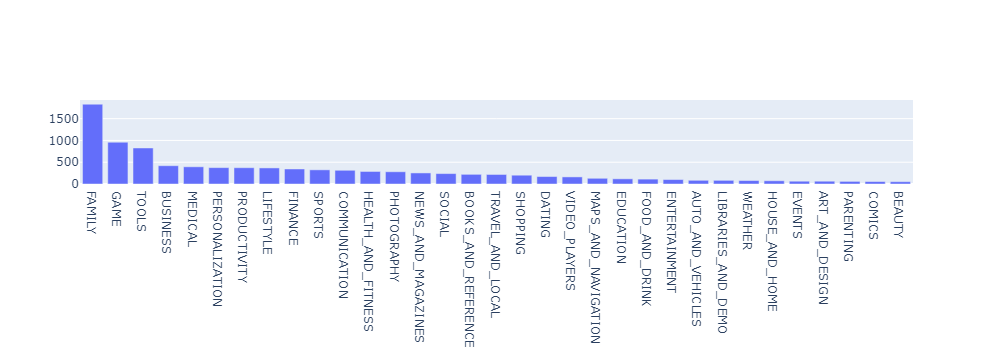

In [15]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Print the total number of unique categories
num_categories = len(apps['Category'].unique())
print('Number of categories = ', num_categories)

# Count the number of apps in each 'Category'. 
num_apps_in_category = apps['Category'].value_counts()

# Sort num_apps_in_category in descending order based on the count of apps in each category
sorted_num_apps_in_category = num_apps_in_category.sort_values(ascending = False)

data = [go.Bar(
        x = num_apps_in_category.index, # index = category name
        y = num_apps_in_category.values, # value = count
)]

plotly.offline.iplot(data)

## 5. Distribution of app ratings
<p>After having witnessed the market share for each category of apps, let's see how all these apps perform on an average. App ratings (on a scale of 1 to 5) impact the discoverability, conversion of apps as well as the company's overall brand image. Ratings are a key performance indicator of an app.</p>
<p>From our research, we found that the average volume of ratings across all app categories is <code>4.17</code>. The histogram plot is skewed to the left indicating that the majority of the apps are highly rated with only a few exceptions in the low-rated apps.</p>

Average app rating =  3.541142975463299


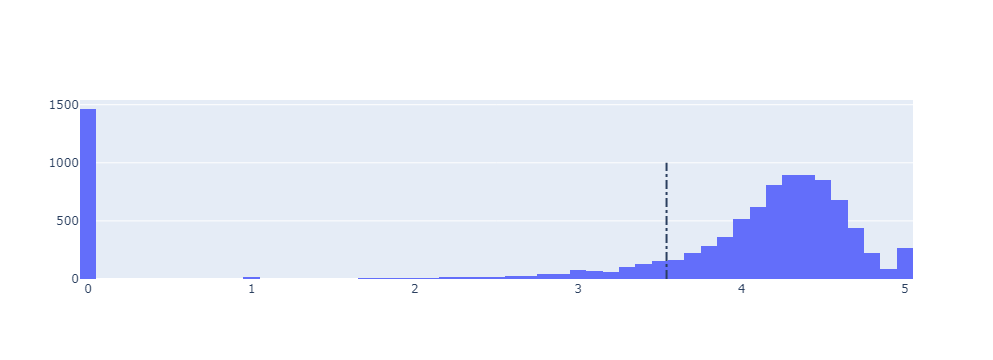

In [16]:
# Average rating of apps
avg_app_rating = apps['Rating'].mean()
print('Average app rating = ', avg_app_rating)

# Distribution of apps according to their ratings
data = [go.Histogram(
        x = apps['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})

## 6. Size and price of an app
<p>Let's now examine app size and app price. For size, if the mobile app is too large, it may be difficult and/or expensive for users to download. Lengthy download times could turn users off before they even experience your mobile app. Plus, each user's device has a finite amount of disk space. For price, some users expect their apps to be free or inexpensive. These problems compound if the developing world is part of your target market; especially due to internet speeds, earning power and exchange rates.</p>
<p>How can we effectively come up with strategies to size and price our app?</p>
<ul>
<li>Does the size of an app affect its rating? </li>
<li>Do users really care about system-heavy apps or do they prefer light-weighted apps? </li>
<li>Does the price of an app affect its rating? </li>
<li>Do users always prefer free apps over paid apps?</li>
</ul>
<p>We find that the majority of top rated apps (rating over 4) range from 2 MB to 20 MB. We also find that the vast majority of apps price themselves under \$10.</p>

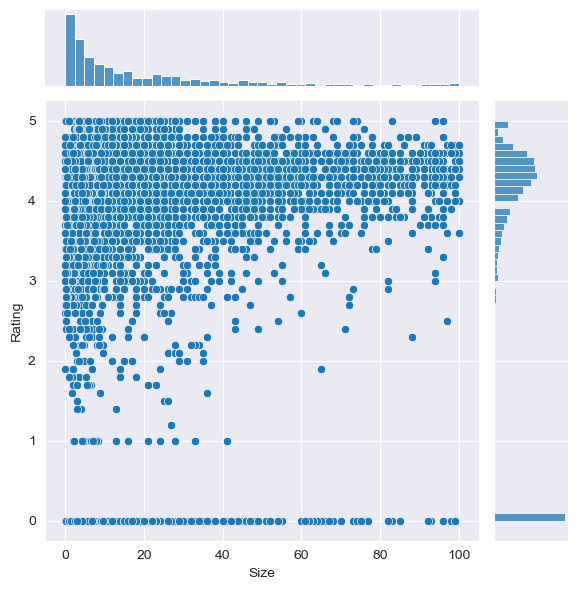

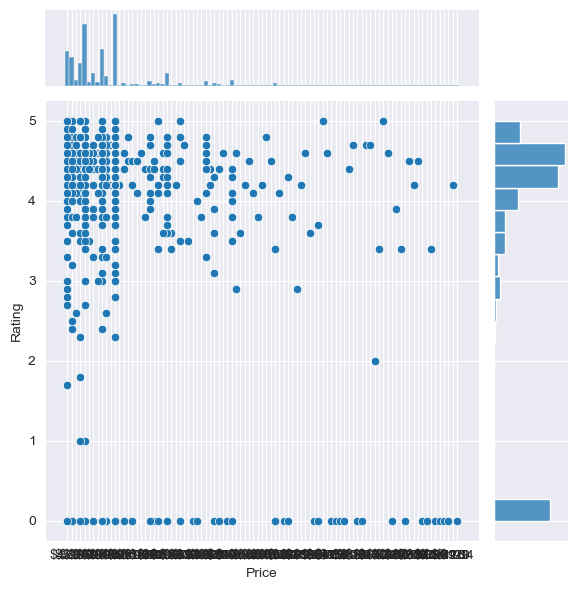

In [17]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby(['Category']).filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'])

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relation between app category and app price
<p>So now comes the hard part. How are companies and developers supposed to make ends meet? What monetization strategies can companies use to maximize profit? The costs of apps are largely based on features, complexity, and platform.</p>
<p>There are many factors to consider when selecting the right pricing strategy for your mobile app. It is important to consider the willingness of your customer to pay for your app. A wrong price could break the deal before the download even happens. Potential customers could be turned off by what they perceive to be a shocking cost, or they might delete an app they’ve downloaded after receiving too many ads or simply not getting their money's worth.</p>
<p>Different categories demand different price ranges. Some apps that are simple and used daily, like the calculator app, should probably be kept free. However, it would make sense to charge for a highly-specialized medical app that diagnoses diabetic patients. Below, we see that <em>Medical and Family</em> apps are the most expensive. Some medical apps extend even up to \$80! All game apps are reasonably priced below \$20.</p>

In [18]:
popular_app_cats = apps

In [19]:
pr_fixed = []
for un_val in popular_app_cats['Price']:
    pr_fixed.append(un_val.replace('$',''))
popular_app_cats['Price fixed'] = pr_fixed

In [20]:
popular_app_cats['Price fixed'] = popular_app_cats["Price fixed"].astype(float)

In [21]:
popular_app_cats['Price fixed']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9654    0.0
9655    0.0
9656    0.0
9657    0.0
9658    0.0
Name: Price fixed, Length: 9659, dtype: float64

## 8. Filter out "junk" apps
<p>It looks like a bunch of the really expensive apps are "junk" apps. That is, apps that don't really have a purpose. Some app developer may create an app called <em>I Am Rich Premium</em> or <em>most expensive app (H)</em> just for a joke or to test their app development skills. Some developers even do this with malicious intent and try to make money by hoping people accidentally click purchase on their app in the store.</p>
<p>Let's filter out these junk apps and re-do our visualization.</p>

Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

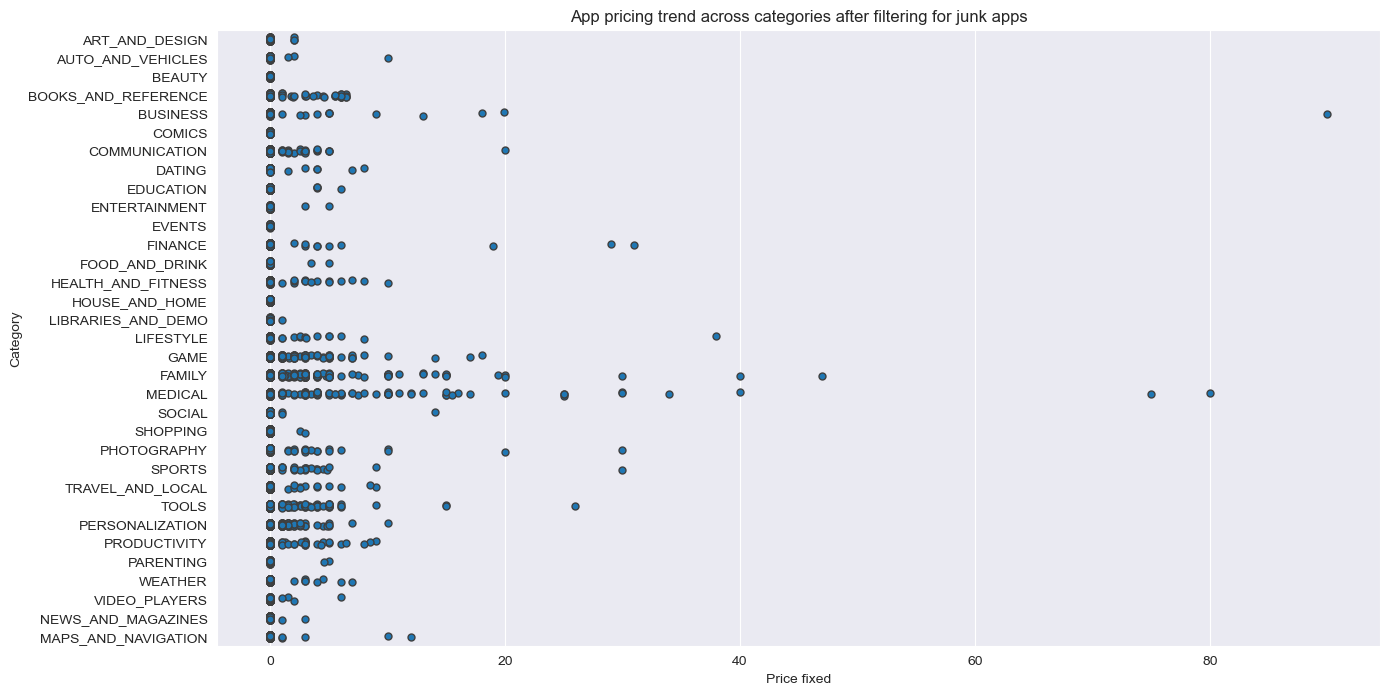

In [22]:
# Select apps priced below $100
apps_under_100 = popular_app_cats[popular_app_cats['Price fixed'] < 100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x = 'Price fixed', y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')

## 9. Popularity of paid apps vs free apps
<p>For apps in the Play Store today, there are five types of pricing strategies: free, freemium, paid, paymium, and subscription. Let's focus on free and paid apps only. Some characteristics of free apps are:</p>
<ul>
<li>Free to download.</li>
<li>Main source of income often comes from advertisements.</li>
<li>Often created by companies that have other products and the app serves as an extension of those products.</li>
<li>Can serve as a tool for customer retention, communication, and customer service.</li>
</ul>
<p>Some characteristics of paid apps are:</p>
<ul>
<li>Users are asked to pay once for the app to download and use it.</li>
<li>The user can't really get a feel for the app before buying it.</li>
</ul>
<p>Are paid apps installed as much as free apps? It turns out that paid apps have a relatively lower number of installs than free apps, though the difference is not as stark as I would have expected!</p>

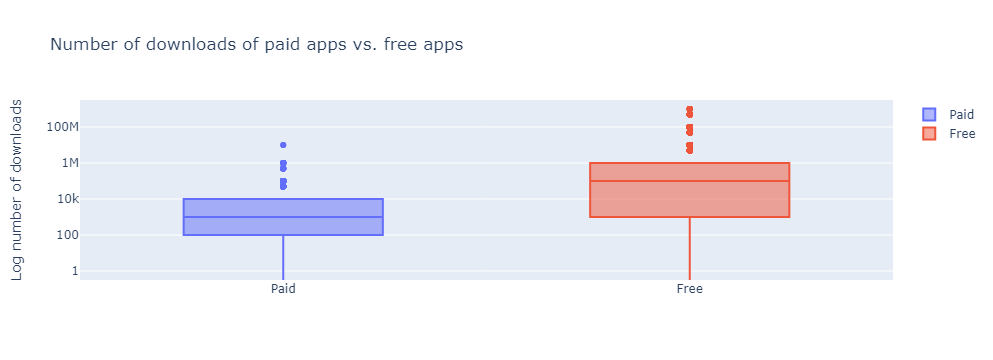

In [23]:
trace0 = go.Box(
    # Data for paid apps
    y = clean_apps[clean_apps['Type'] == 'Paid']['Instal fixed'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = clean_apps[clean_apps['Type'] == 'Free']['Instal fixed'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. Sentiment analysis of user reviews
<p>Mining user review data to determine how people feel about your product, brand, or service can be done using a technique called sentiment analysis. User reviews for apps can be analyzed to identify if the mood is positive, negative or neutral about that app. For example, positive words in an app review might include words such as 'amazing', 'friendly', 'good', 'great', and 'love'. Negative words might be words like 'malware', 'hate', 'problem', 'refund', and 'incompetent'.</p>
<p>By plotting sentiment polarity scores of user reviews for paid and free apps, we observe that free apps receive a lot of harsh comments, as indicated by the outliers on the negative y-axis. Reviews for paid apps appear never to be extremely negative. This may indicate something about app quality, i.e., paid apps being of higher quality than free apps on average. The median polarity score for paid apps is a little higher than free apps, thereby syncing with our previous observation.</p>
<p>In this notebook, we analyzed over ten thousand apps from the Google Play Store. We can use our findings to inform our decisions should we ever wish to create an app ourselves.</p>

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

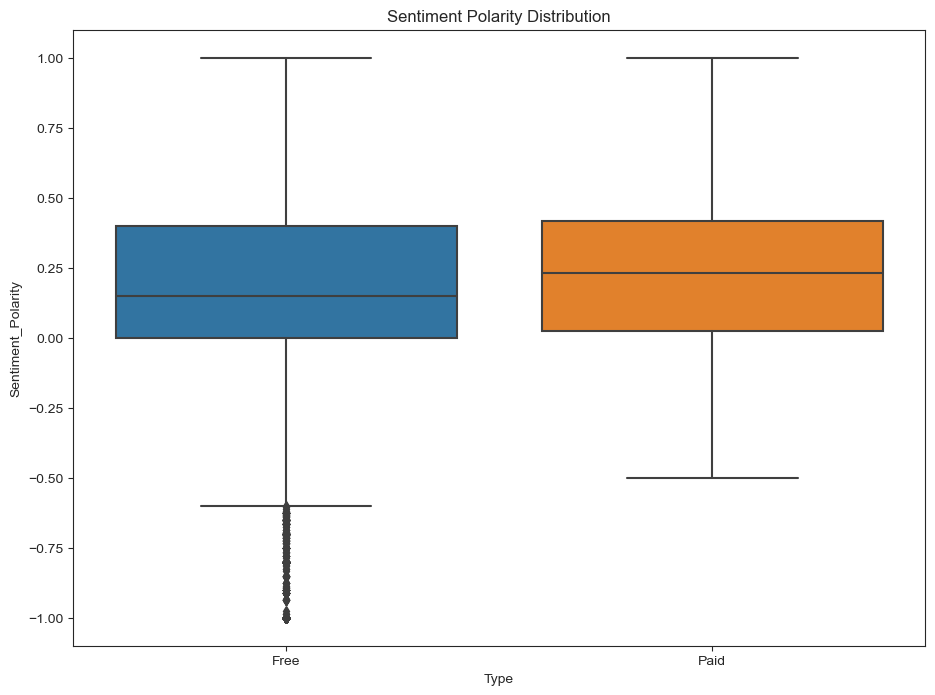

In [24]:
# Load user_reviews.csv
reviews_df = pd.read_csv(r"C:\The Android App Market on Google Play\datasets\user_reviews.csv")

# Join the two dataframes
merged_df = pd.merge(clean_apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')

In [25]:
reviews_df

,App,Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000
...,...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [63]:
unique_apps = list(set(reviews_df['App']))
Final_data = []
for app_name in unique_apps:
    temp_reviw =  reviews_df[reviews_df['App']==app_name]
    temp_clndt = clean_apps[clean_apps['App'] == app_name]
    if len(temp_clndt) > 0:
        temp_clndt = temp_clndt.iloc[0,:]
        try:
            temp_clndt['Sentiment'] = temp_reviw['Sentiment'].mode().values[0]
        except Exception:
            temp_clndt['Sentiment'] = 'Non rated'
        temp_clndt['Sentiment_Polarity'] = temp_reviw['Sentiment_Polarity'].mean()
        temp_clndt['Sentiment_Subjectivity'] = temp_reviw['Sentiment_Subjectivity'].mean()
        Final_data.append(temp_clndt.to_dict())
Final_data = pd.DataFrame(Final_data)

In [64]:
Final_data=Final_data.drop(Final_data[Final_data['Sentiment']=='Non rated'].index)

In [65]:
Final_data['Sentiment']

0       Positive
1       Positive
2       Positive
3       Positive
4        Neutral
          ...   
1013    Positive
1015    Negative
1016    Positive
1018    Positive
1019    Positive
Name: Sentiment, Length: 816, dtype: object

In [66]:
categorical_feature_mask = Final_data.dtypes==object
categorical_cols = Final_data.columns[categorical_feature_mask].tolist()
le = LabelEncoder()
Final_data[categorical_cols] = Final_data[categorical_cols].apply(lambda col: le.fit_transform(col))
Final_data[categorical_cols].head(10)

,App,Category,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment
0,185,17,0,8,1,35,88,333,8,2
1,55,32,0,8,1,66,39,492,21,2
2,214,13,0,8,4,32,223,405,17,2
3,362,6,0,8,1,19,121,411,11,2
4,559,29,0,8,1,62,6,492,21,1
6,432,11,0,8,1,55,24,276,11,2
7,648,23,0,8,1,43,103,492,21,2
9,615,7,0,8,3,20,82,368,13,2
10,204,15,0,8,1,33,21,454,17,2
11,604,13,0,8,4,32,108,492,21,2


In [32]:
Final_data.isna().sum()

Unnamed: 0                0
App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Instal fixed              0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [33]:
Final_data[['Sentiment_Polarity','Sentiment_Subjectivity']]=Final_data[['Sentiment_Polarity','Sentiment_Subjectivity']].fillna(0)

In [34]:
Final_data.isna().sum()

Unnamed: 0                0
App                       0
Category                  0
Rating                    0
Reviews                   0
Size                      0
Type                      0
Price                     0
Content Rating            0
Genres                    0
Last Updated              0
Current Ver               0
Android Ver               0
Instal fixed              0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [35]:
y = Final_data.Sentiment
X = Final_data.drop(columns='Sentiment')

In [36]:
model = LogisticRegression()
sfs = SequentialFeatureSelector(model, n_features_to_select=3)
sfs.fit(X, y)

SequentialFeatureSelector(estimator=LogisticRegression(),
                          n_features_to_select=3)

In [72]:
y = Final_data.Sentiment
X = Final_data.drop(columns='Sentiment')

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_mat)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.8597560975609756
Confusion Matrix:
[[  0   0  12]
 [  0   0   8]
 [  3   0 141]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         8
           2       0.88      0.98      0.92       144

    accuracy                           0.86       164
   macro avg       0.29      0.33      0.31       164
weighted avg       0.77      0.86      0.81       164



In [55]:
y = Final_data.Sentiment
X = Final_data.drop(columns='Sentiment')


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM model
model = SVC()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion_mat)
print('Classification Report:')
print(classification_rep)


Accuracy: 0.8780487804878049
Confusion Matrix:
[[  0   0  12]
 [  0   0   8]
 [  0   0 144]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.00      0.00      0.00         8
           2       0.88      1.00      0.94       144

    accuracy                           0.88       164
   macro avg       0.29      0.33      0.31       164
weighted avg       0.77      0.88      0.82       164



In [54]:
# Load a sample dataset (Iris dataset in this example)
y = Final_data.Sentiment
X = Final_data.drop(columns='Sentiment')

# Split the dataset into a training set and a testing set (you can customize the split ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Gaussian NB classifier
gnb = GaussianNB()

# Fit the classifier to the training data
gnb.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = gnb.predict(X_test)

# Evaluate the classifier's performance (you can use different metrics)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)


Accuracy: 0.20816326530612245
Confusion Matrix:
 [[  2  12   7]
 [  0  11   1]
 [ 10 164  38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.10      0.12        21
           1       0.06      0.92      0.11        12
           2       0.83      0.18      0.29       212

    accuracy                           0.21       245
   macro avg       0.35      0.40      0.18       245
weighted avg       0.73      0.21      0.27       245



In [ ]:
pip install lazypredict

In [ ]:
pip install scipy==1.7.1

In [61]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
y = Final_data.Sentiment
X = Final_data.drop(columns='Sentiment')
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.5,random_state =123)
clf = LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test,)
models

100%|██████████| 29/29 [00:02<00:00, 12.15it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000167 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1052
[LightGBM] [Info] Number of data points in the train set: 408, number of used features: 14
[LightGBM] [Info] Start training from score -2.427748
[LightGBM] [Info] Start training from score -3.303217
[LightGBM] [Info] Start training from score -0.133531
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.83,0.72,None,0.85,0.02
BaggingClassifier,0.92,0.69,None,0.92,0.07
XGBClassifier,0.93,0.69,None,0.92,0.19
SGDClassifier,0.92,0.66,None,0.91,0.04
DecisionTreeClassifier,0.91,0.64,None,0.90,0.03
RandomForestClassifier,0.92,0.61,None,0.91,0.41
LogisticRegression,0.91,0.60,None,0.90,0.04
PassiveAggressiveClassifier,0.90,0.58,None,0.89,0.03
LinearSVC,0.91,0.57,None,0.90,0.05


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'NearestCentroid'),
  Text(1, 0, 'BaggingClassifier'),
  Text(2, 0, 'XGBClassifier'),
  Text(3, 0, 'SGDClassifier'),
  Text(4, 0, 'DecisionTreeClassifier'),
  Text(5, 0, 'RandomForestClassifier'),
  Text(6, 0, 'LogisticRegression'),
  Text(7, 0, 'PassiveAggressiveClassifier'),
  Text(8, 0, 'LinearSVC'),
  Text(9, 0, 'AdaBoostClassifier'),
  Text(10, 0, 'Perceptron'),
  Text(11, 0, 'LGBMClassifier'),
  Text(12, 0, 'ExtraTreeClassifier'),
  Text(13, 0, 'LinearDiscriminantAnalysis'),
  Text(14, 0, 'LabelPropagation'),
  Text(15, 0, 'LabelSpreading'),
  Text(16, 0, 'CalibratedClassifierCV'),
  Text(17, 0, 'ExtraTreesClassifier'),
  Text(18, 0, 'QuadraticDiscriminantAnalysis'),
  Text(19, 0, 'KNeighborsClassifier'),
  Text(20, 0, 'GaussianNB'),
  Text(21, 0, 'RidgeClassifier'),
  Text(22, 0, 'RidgeClassifierCV'),
  Text(23, 0, 'SVC'),
  Text(24, 0, 'Bernoull

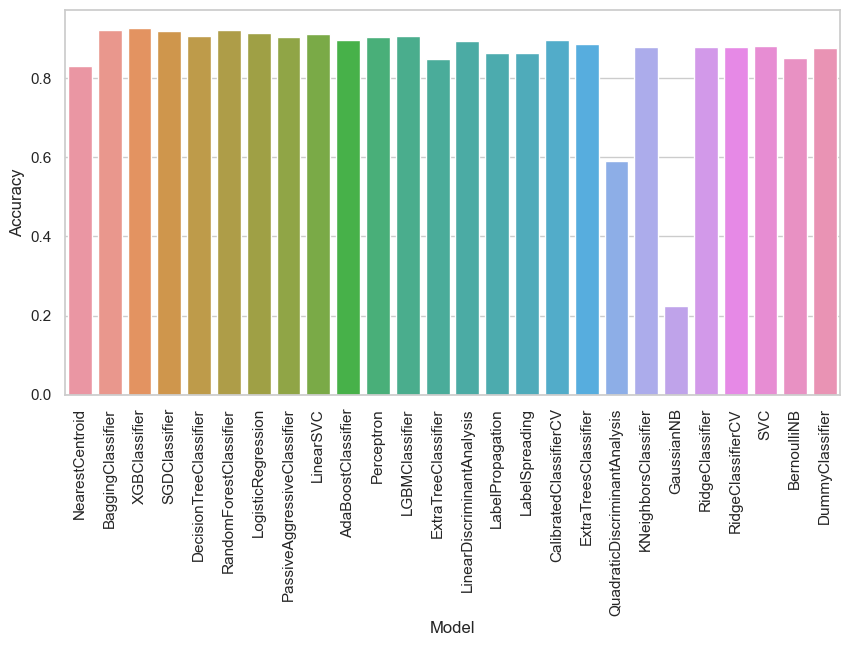

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=models.index, y="Accuracy", data=models)
plt.xticks(rotation=90)